# Dinámicas

In [1]:
import numpy as np 
import sympy as sym
from sympy.utilities.lambdify import lambdify, implemented_function
import scipy.signal as ctrl
from ipywidgets import interact, interactive, widgets
from IPython.display import display
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib import pyplot as plt
mpl.rc('animation', html='html5')
%matplotlib notebook 

sin = sym.sin
cos = sym.cos

## Low-pass

In [6]:
u_in,y = sym.symbols('u_in,y')
K,T = sym.symbols('K,T')
dy = 1.0/T*(K*u_in - y)

f = sym.Matrix([dy])
h = sym.Matrix([y])

u = sym.Matrix([u_in])
x = sym.Matrix([y])
z = sym.Matrix([h])

F_x = f.jacobian(x)
F_u = f.jacobian(u)
H_x = h.jacobian(x)
H_u = h.jacobian(u)

params = {'K':1.0, 'T':0.2}

A = sym.lambdify((),F_x.subs(params),'numpy')()
B = sym.lambdify((),F_u.subs(params),'numpy')()
C = sym.lambdify((),H_x.subs(params),'numpy')()
D = sym.lambdify((),H_u.subs(params),'numpy')()

sys = ctrl.lti(A,B,C,D)

np.linalg.eig(A)

(array([-5.]), array([[ 1.]]))

<IPython.core.display.Javascript object>


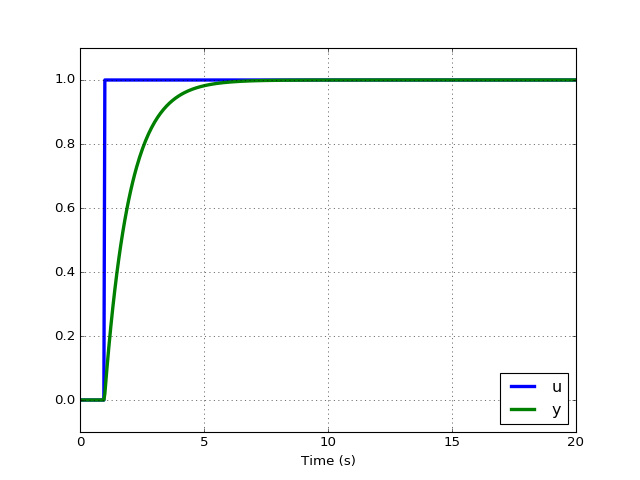

In [3]:
T = np.linspace(0,20,500)
U = np.zeros(T.shape)
U[T>1.0]=1.0
t_out,y_out,x_out = ctrl.lsim2(sys, U=U, T=T)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(True)
ax.plot(T,U, lw=3.0, label='u') 
ax.plot(t_out,y_out, lw=3.0, label='y')  
ax.set_xlabel('Time (s)')
ax.legend(loc='best')
ax.set_ylim((-0.1,1.1))
fig.savefig('low_pass_step.svg',bbox_inches='tight')

<IPython.core.display.Javascript object>


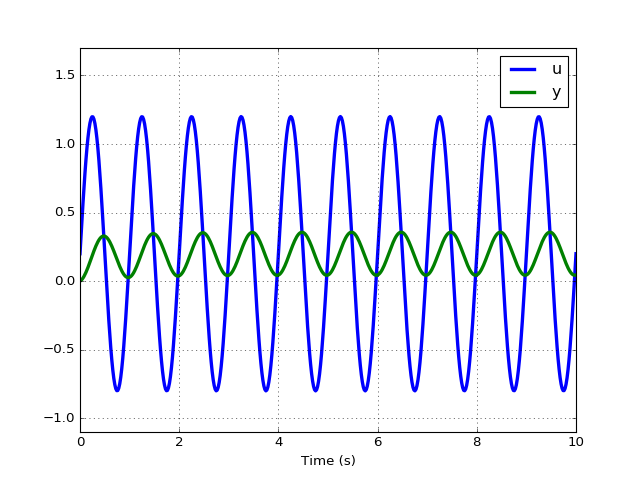

In [4]:
T = np.linspace(0,10,500)
U = np.sin(2.0*np.pi*1.0*T)+0.2
t_out,y_out,x_out = ctrl.lsim2(sys, U=U, T=T)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(True)
ax.plot(T,U, lw=3.0, label='u') 
ax.plot(t_out,y_out, lw=3.0, label='y')
ax.set_xlabel('Time (s)')
ax.legend(loc='best')
ax.set_ylim((-1.1,1.7))
fig.savefig('low_pass_sin.svg',bbox_inches='tight')

## Wash-out

In [5]:
u_in,yp,y = sym.symbols('u_in,yp,y')
K,T_w = sym.symbols('K,T_w')
dyp = 1.0/T_w*(K*u_in - yp)
f = sym.Matrix([dyp])
h = sym.Matrix([(K*u_in - yp)])

u = sym.Matrix([u_in])
x = sym.Matrix([yp])
z = sym.Matrix([h])

F_x = f.jacobian(x)
F_u = f.jacobian(u)
H_x = h.jacobian(x)
H_u = h.jacobian(u)

params = {'K':1.0, 'T_w':5.0}

A = sym.lambdify((),F_x.subs(params),'numpy')()
B = sym.lambdify((),F_u.subs(params),'numpy')()
C = sym.lambdify((),H_x.subs(params),'numpy')()
D = sym.lambdify((),H_u.subs(params),'numpy')()

sys = ctrl.lti(A,B,C,D)

<IPython.core.display.Javascript object>


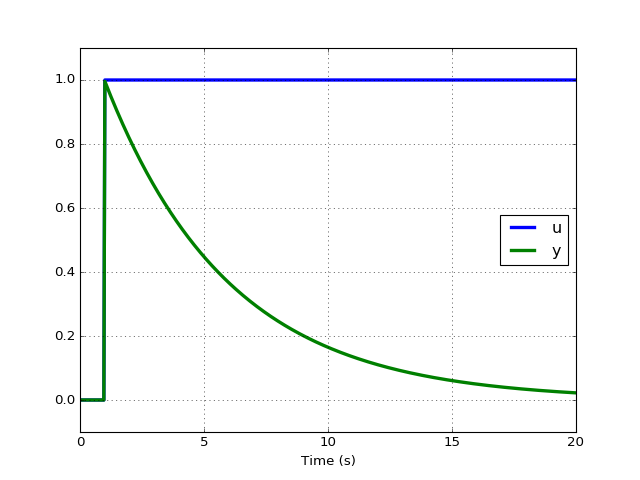

In [6]:
T = np.linspace(0,20,500)
U = np.zeros(T.shape)
U[T>1.0]=1.0
t_out,y_out,x_out = ctrl.lsim2(sys, U=U, T=T)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(True)
ax.plot(T,U, lw=3.0, label='u') 
ax.plot(t_out,y_out, lw=3.0, label='y')  
ax.set_xlabel('Time (s)')
ax.legend(loc='best')
ax.set_ylim((-0.1,1.1))
fig.savefig('washout_step.svg',bbox_inches='tight')

<IPython.core.display.Javascript object>


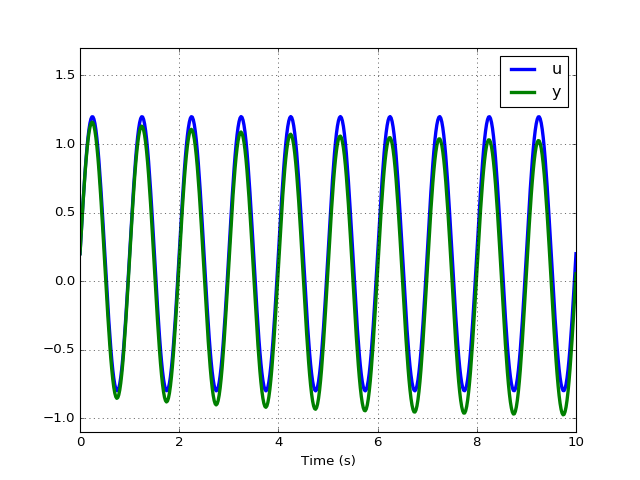

In [7]:
T = np.linspace(0,10,500)
U = np.sin(2.0*np.pi*1.0*T)+0.2
t_out,y_out,x_out = ctrl.lsim2(sys, U=U, T=T)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(True)
ax.plot(T,U, lw=3.0, label='u') 
ax.plot(t_out,y_out, lw=3.0, label='y')
ax.set_xlabel('Time (s)')
ax.legend(loc='best')
ax.set_ylim((-1.1,1.7))
fig.savefig('washout_sin.svg',bbox_inches='tight')

## Lead-lag

In [8]:
u_in,yp,y = sym.symbols('u_in,yp,y')
K,T_1,T_2 = sym.symbols('K,T_1,T_2')
dyp = 1.0/T_2*(u_in - yp)

f = sym.Matrix([dyp])
h = sym.Matrix([T_1/T_2*u_in + (1.0-1.0/T_2)*yp])

u = sym.Matrix([u_in])
x = sym.Matrix([yp])
z = sym.Matrix([h])

F_x = f.jacobian(x)
F_u = f.jacobian(u)
H_x = h.jacobian(x)
H_u = h.jacobian(u)

params = {'K':2.0,'T_1':0.5, 'T_2':0.2}

A = sym.lambdify((),F_x.subs(params),'numpy')()
B = sym.lambdify((),F_u.subs(params),'numpy')()
C = sym.lambdify((),H_x.subs(params),'numpy')()
D = sym.lambdify((),H_u.subs(params),'numpy')()

sys = ctrl.lti(A,B,C,D)

<IPython.core.display.Javascript object>


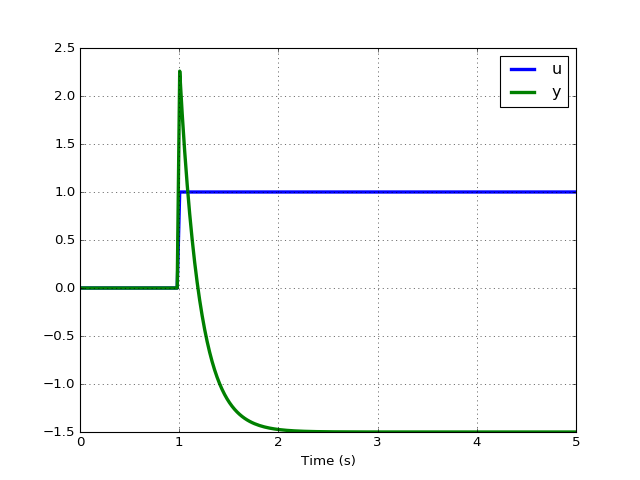

In [9]:
T = np.linspace(0,5,200)
U = np.zeros(T.shape)
U[T>1.0]=1.0
t_out,y_out,x_out = ctrl.lsim2(sys, U=U, T=T)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(True)
ax.plot(T,U, lw=3.0, label='u') 
ax.plot(t_out,y_out, lw=3.0, label='y')  
ax.set_xlabel('Time (s)')
ax.legend(loc='best')
#ax.set_ylim((-0.1,2.1))
fig.savefig('lead_lag_1_step.svg',bbox_inches='tight')

In [10]:
T = np.linspace(0,5,500)
U = np.sin(2.0*np.pi*1.0*T)
t_out,y_out,x_out = ctrl.lsim2(sys, U=U, T=T)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(True)
ax.plot(T,U, lw=3.0, label='u') 
ax.plot(t_out,y_out, lw=3.0, label='y')
ax.set_xlabel('Time (s)')
ax.legend(loc='best')
#ax.set_ylim((-1.1,1.7))
fig.savefig('lead_lag_1_sin.svg',bbox_inches='tight')

<IPython.core.display.Javascript object>

In [12]:
u = sym.Matrix([P_t,V_t])

f_eval = lambdify((x,y,u), f.subs(params), "numpy")
g_eval = lambdify((x,y,u), g.subs(params), "numpy")
F_x_eval = lambdify((x,y,u), F_x.subs(params), "numpy")
F_y_eval = lambdify((x,y,u), F_y.subs(params), "numpy")
G_x_eval = lambdify((x,y,u), G_x.subs(params), "numpy")
G_y_eval = lambdify((x,y,u), G_y.subs(params), "numpy")

lam_sym = f.col_join(g)
xi_sym = x.col_join(y)
Lam_f = F_x.row_join(F_y)
Lam_g = G_x.row_join(G_y)
Lam_sym = Lam_f.col_join(Lam_g)


lam = lambdify((xi_sym,u), lam_sym.subs(params), "numpy")
Lam = lambdify((xi_sym,u), Lam_sym.subs(params), "numpy")



NameError: name 'P_t' is not defined